<a href="https://colab.research.google.com/github/Morris2727/python/blob/master/%E8%B2%A1%E7%B5%B1%E4%BD%9C%E6%A5%AD%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

Collect the data from Dow Jones Industrial Index

In [ ]:
df = yf.download("^DJI", start = "2011-01-01", end = "2020-12-31", progress = False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11577.429688,11711.469727,11577.349609,11670.750000,11670.750000,203420000
2011-01-04,11670.900391,11698.219727,11635.740234,11691.179688,11691.179688,178630000
2011-01-05,11688.610352,11742.679688,11652.889648,11722.889648,11722.889648,169990000
2011-01-06,11716.929688,11736.740234,11667.459961,11697.309570,11697.309570,193080000
2011-01-07,11696.860352,11726.940430,11599.679688,11674.759766,11674.759766,188720000
...,...,...,...,...,...,...
2020-12-23,30046.730469,30292.529297,30046.730469,30129.830078,30129.830078,274050000
2020-12-24,30155.919922,30209.669922,30099.300781,30199.869141,30199.869141,145570000
2020-12-28,30283.230469,30525.560547,30283.230469,30403.970703,30403.970703,302490000


取出資料庫裡“Adj Close"的部分

In [ ]:
df_AC = df["Adj Close"]
df_AC

Date
2011-01-03    11670.750000
2011-01-04    11691.179688
2011-01-05    11722.889648
2011-01-06    11697.309570
2011-01-07    11674.759766
                  ...     
2020-12-23    30129.830078
2020-12-24    30199.869141
2020-12-28    30403.970703
2020-12-29    30335.669922
2020-12-30    30409.560547
Name: Adj Close, Length: 2516, dtype: float64

In [ ]:
df_AC[1:len(df_AC)]

Date
2011-01-04    11691.179688
2011-01-05    11722.889648
2011-01-06    11697.309570
2011-01-07    11674.759766
2011-01-10    11637.450195
                  ...     
2020-12-23    30129.830078
2020-12-24    30199.869141
2020-12-28    30403.970703
2020-12-29    30335.669922
2020-12-30    30409.560547
Name: Adj Close, Length: 2515, dtype: float64

計算DJI在這十年裡的daily return

In [ ]:
df_return = (df_AC[1:len(df_AC)].values/df_AC[0:(len(df_AC)-1)].values)-1
df_return

array([ 0.0017505 ,  0.0027123 , -0.00218206, ...,  0.00675836,
       -0.00224644,  0.00243577])

Compute daily return's mean, variance, skewness, kurtosis.

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
print("mean:", df_return.mean())
print("variance:", df_return.var())
print("skewness:", skew(df_return))
print("kurtosis:",kurtosis(df_return))

mean: 0.00044210614933772627
variance: 0.0001218159224273359
skewness: -0.6178113289186947
kurtosis: 21.66919649002933


In [ ]:
import seaborn as sns

Draw the return's distribution

<Axes: ylabel='Count'>

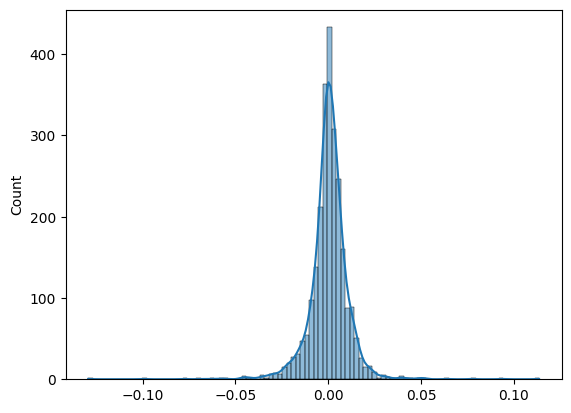

In [ ]:
sns.histplot(data = df_return, bins=100, kde=True)

In [ ]:
df_return1 = df_return[df_return>0]

Draw the return distribution condition on the return is positive

<Axes: ylabel='Count'>

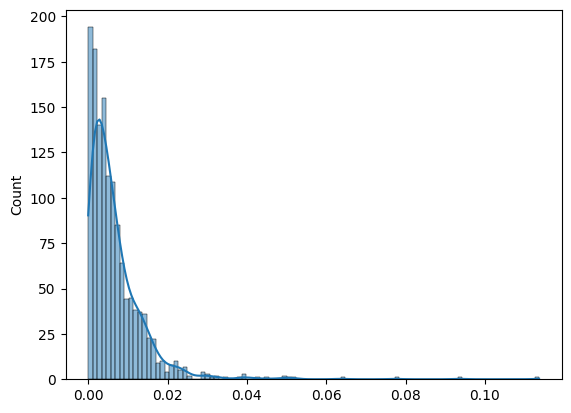

In [ ]:
sns.histplot(data = df_return1, bins=100, kde=True)

Compute mean, variance, skewness, kurtosis of daily return which is positive.

In [ ]:
print("mean:", df_return1.mean())
print("variance:", df_return1.var())
print("skewness:", skew(df_return1))
print("kurtosis:",kurtosis(df_return1))

mean: 0.006740979797135684
variance: 6.226521474851681e-05
skewness: 4.915344148364733
kurtosis: 44.81473413236747


Import the data of all the firms from North America.

In [ ]:
from google.colab import drive
# 上傳csv檔案
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/NA.csv')

In [ ]:
data

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$112.69,-3.2200,-2.778%,3.297166e+10,United States,1999.0,1818036,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$28.85,0.0000,0.00%,5.148271e+09,United States,2016.0,4524804,Industrials,Aluminum
2,AACI,Armada Acquisition Corp. I Common Stock,$10.70,-0.0500,-0.465%,0.000000e+00,United States,2021.0,835,Finance,Blank Checks
3,AACIU,Armada Acquisition Corp. I Unit,$10.65,0.0000,0.00%,0.000000e+00,United States,2021.0,8,Finance,Blank Checks
4,AACIW,Armada Acquisition Corp. I Warrant,$0.0754,-0.0089,-10.558%,0.000000e+00,United States,2021.0,200,Finance,Blank Checks
...,...,...,...,...,...,...,...,...,...,...,...
5932,ZVSA,ZyVersa Therapeutics Inc. Common Stock,$0.1321,-0.0169,-11.342%,4.081122e+06,United States,2022.0,4658799,Health Care,Biotechnology: Pharmaceutical Preparations
5933,ZWS,Zurn Elkay Water Solutions Corporation Common ...,$28.15,-0.3100,-1.089%,4.868479e+09,United States,2012.0,861350,Industrials,Industrial Machinery/Components
5934,ZYME,Zymeworks Inc. Common Stock,$6.79,-0.0100,-0.147%,4.605432e+08,United States,NaN,253470,Health Care,Biotechnology: Pharmaceutical Preparations
5935,ZYNE,Zynerba Pharmaceuticals Inc. Common Stock,$1.33,-0.0600,-4.317%,7.173944e+07,United States,2015.0,784475,Health Care,Biotechnology: Pharmaceutical Preparations


Collect the data of "Close" from the firms of North America.

In [ ]:
x = yf.download(data.Symbol.to_list(), start="2011-01-01", end = "2020-12-31")["Close"]
x

[**                     4%%                      ]  213 of 5937 completed

ERROR:yfinance:Failed to get ticker 'HEI/A' reason: Expecting value: line 1 column 1 (char 0)


[**                     5%%                      ]  322 of 5937 completed

ERROR:yfinance:Failed to get ticker 'BF/A' reason: Expecting value: line 1 column 1 (char 0)


[*****                 10%%                      ]  607 of 5937 completed

ERROR:yfinance:Failed to get ticker 'CRD/A' reason: Expecting value: line 1 column 1 (char 0)


[***********           23%%                      ]  1371 of 5937 completed

ERROR:yfinance:Failed to get ticker 'BF/B' reason: Expecting value: line 1 column 1 (char 0)


[***************       31%%                      ]  1831 of 5937 completed

ERROR:yfinance:Failed to get ticker 'BIO/B' reason: Expecting value: line 1 column 1 (char 0)


[**********************49%%                      ]  2892 of 5937 completed

ERROR:yfinance:Failed to get ticker 'WSO/B' reason: Expecting value: line 1 column 1 (char 0)


[**********************52%%                      ]  3083 of 5937 completed

ERROR:yfinance:Failed to get ticker 'CRD/B' reason: Expecting value: line 1 column 1 (char 0)


[**********************62%%****                  ]  3696 of 5937 completed

ERROR:yfinance:Failed to get ticker 'BRK/A' reason: Expecting value: line 1 column 1 (char 0)


[**********************91%%******************    ]  5384 of 5937 completed

ERROR:yfinance:Failed to get ticker 'BRK/B' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  5937 of 5937 completed

ERROR:yfinance:
1679 Failed downloads:
ERROR:yfinance:['TOIIW', 'BOCNW', 'BWAQW', 'FRBNW', 'LFLYW', 'KERNW', 'SWSSW', 'GOEVW', 'HTZWW', 'BFRIW', 'KRNLW', 'ADERW', 'IOACW', 'PTHRW', 'SLDPW', 'OCAXW', 'BTBDW', 'DUNEW', 'KVACW', 'GLLIW', 'HUMAW', 'APCXW', 'WINVW', 'OAKUW', 'PLTNR', 'MSSAW', 'HSCSW', 'ASTSW', 'DBGIW', 'USGOW', 'TWLVW', 'LNZAW', 'DTOCW', 'HPLTW', 'GOVXW', 'MARXR', 'SCLXW', 'SHFSW', 'YOTAR', 'RMGCW', 'PMGMW', 'CIFRW', 'MACAW', 'CELUW', 'OLITW', 'PRLHW', 'SFB', 'ROSEW', 'NRACW', 'ESACW', 'UHGWW', 'BTMWW', 'WINVR', 'AREBW', 'CONXW', 'DHCNL', 'SQFTW', 'PLTNW', 'BREZW', 'LGSTW', 'CURIW', 'DTSTW', 'CXAIW', 'VHNAW', 'AQUNR', 'DHACW', 'ENERR', 'BZFDW', 'ENERW', 'FEXDR', 'CCTSW', 'NUBIW', 'BRKHW', 'TLGYW', 'FICVW', 'MVSTW', 'LFACW', 'LTRYW', 'NPABW', 'YOTAW', 'IPXXW', 'AGRIW', 'BFRGW', 'GFGDR', 'BCTXW', 'VIEWW', 'ORGNW', 'BWAQR', 'VWEWW', 'PUCKW', 'IMAQR', 'BFIIW', 'SZZLW', 'EVLVW', 'HOLOW', 'PPYAW', 'ONFOW', 'PAYOW', 'ONYXW', 'SVIIR', 'KPLTW', 'IVDAW', 'TMPOW', 'BENFW', 'MAPSW', 'S

ERROR:yfinance:['FIGS', 'HAYW', 'ALTU', 'SAJ', 'ASNS', 'SHPH', 'UROY', 'TKNO', 'MCW', 'ESAC', 'XOMAO', 'ATMCU', 'QOMO', 'ACON', 'STSS', 'APXIU', 'GAMC', 'NVOS', 'OCCIO', 'DATSW', 'GECCO', 'NSTS', 'DTOCU', 'CRBG', 'IRAAU', 'IRAA', 'EFTR', 'ASST', 'CFFEU', 'LCA', 'MRDB', 'APLM', 'ABOS', 'MSSAU', 'TBMCR', 'AGTI', 'DAWN', 'ANEB', 'EVCM', 'TMTC', 'MCAC', 'SGII', 'MACA', 'LUCYW', 'BJDX', 'NETD', 'SERA', 'FINW', 'GIA', 'PPTA', 'ZFOX', 'BHIL', 'SEAT', 'PACWP', 'OCAX', 'AENT', 'CCTS', 'VERA', 'DISA', 'SVII', 'IOAC', 'RPHM', 'ARTEU', 'SBFM', 'PEPG', 'UZF', 'TPG', 'TYGO', 'REBN', 'LIPO', 'ZLS', 'GBNH', 'DIBS', 'NETDU', 'GBTG', 'CNTX', 'PFTA', 'BLAC', 'GFS', 'MEGI', 'BRAC', 'PIK', 'CHK', 'PTWOU', 'TLGY', 'EFHT', 'POWWP', 'BLFY', 'PLTN', 'GDNR', 'ISPC', 'AIRS', 'FSRXU', 'VLCN', 'SCCE', 'AMLX', 'MAMA', 'CVKD', 'XRTX', 'LANDM', 'ELYM', 'CMTG', 'FRGE', 'ZVSA', 'LIFWW', 'TIL', 'HNNAZ', 'FRLAW', 'RELY', 'DECA', 'DFH', 'CNGL', 'TDUP', 'LBBB', 'ATMV', 'WTMA', 'MAQCU', 'MRAI', 'HTIBP', 'ISPOW', 'OAKUR', 'D

,A,AA,AACI,AACIU,AACIW,AADI,AAIC,AAIC^B,AAIC^C,AAIN,...,ZTS,ZUMZ,ZUO,ZVIA,ZVRA,ZVSA,ZWS,ZYME,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,29.957083,37.967400,NaN,NaN,NaN,NaN,24.600000,NaN,NaN,NaN,...,NaN,27.139999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563636
2011-01-04,29.678112,39.697559,NaN,NaN,NaN,NaN,24.059999,NaN,NaN,NaN,...,NaN,25.450001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572727
2011-01-05,29.613733,39.793678,NaN,NaN,NaN,NaN,24.650000,NaN,NaN,NaN,...,NaN,26.670000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581818
2011-01-06,29.670959,39.313080,NaN,NaN,NaN,NaN,24.360001,NaN,NaN,NaN,...,NaN,24.440001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581818
2011-01-07,29.771103,39.457260,NaN,NaN,NaN,NaN,24.530001,NaN,NaN,NaN,...,NaN,25.639999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.581818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,117.300003,22.219999,NaN,NaN,NaN,15.90,3.850000,NaN,NaN,NaN,...,159.850006,36.650002,13.80,NaN,15.952,NaN,38.880001,51.009998,3.41,12.554545
2020-12-24,117.309998,21.959999,NaN,NaN,NaN,15.75,3.840000,NaN,NaN,NaN,...,160.720001,36.009998,14.36,NaN,11.520,NaN,39.230000,50.130001,3.42,12.427273
2020-12-28,117.830002,22.240000,NaN,NaN,NaN,15.30,3.830000,NaN,NaN,NaN,...,162.389999,36.709999,14.71,NaN,14.470,NaN,39.580002,49.779999,3.33,12.318182
